In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv('fruits.csv')
df.head()

,diameter,weight,FruitName
0,3.0,30,Banana
1,6.0,100,Apple
2,6.1,95,Apple
3,3.2,35,Banana
4,5.5,80,Apple


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_y=LabelEncoder()
y=label_y.fit_transform(y)
y

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [7]:
from sklearn.model_selection import train_test_split

In [14]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [17]:
y_pred=lr.predict(test_x)
y_pred

array([0, 0, 1, 0, 0, 0, 1])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
c_m=confusion_matrix(test_y,y_pred)
c_m

array([[5, 0],
       [0, 2]])

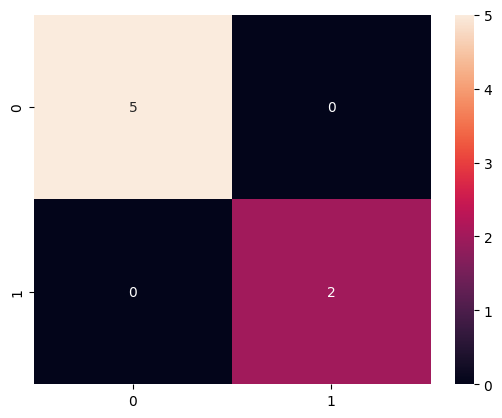

In [20]:
sb.heatmap(c_m,annot=True)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(test_y,y_pred)

1.0

In [27]:
np.where(y_pred!=test_y)

(array([], dtype=int64),)

In [29]:
print(lr.predict([[4.5,60]]))
print(lr.predict_proba([[4.5,60]]))

[1]
[[0.41539454 0.58460546]]


In [30]:
lr.coef_

array([[-0.77644786, -0.01610186]])

In [31]:
lr.intercept_

array([4.80183564])

In [32]:
z=((-0.77644786*4.5)+(-0.01610186*60)+4.80183564)
z

0.34170867000000005

In [33]:
print(lr.decision_function([[4.5,60]]))

[0.34170842]


In [34]:
p_1=1/(1+np.exp(-z))
p_1

np.float64(0.5846055195071964)

In [35]:
if (p_1<0.5):
    print('Apple')
else:
    print('Banana')

Banana
